In [141]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [60]:
# Create a set of random latitudes and longitude combinations
lats = np.random.uniform(-90.000,90.000,1500)
longs = np.random.uniform(-180.000,180.000,1500)

In [61]:
# Combine both arrays
lats_longs = zip(lats,longs)
lats_longs


In [62]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_longs)


In [82]:
# Use the tuple() function to display the latitude and longitude combinations.
# city_name and country_code can be used to get the cities and their country code
# for cord in coordinates:
#     print(citipy.nearest_city(cord[0],cord[1]).city_name,
#           citipy.nearest_city(cord[0],cord[1]).country_code)

In [70]:
# Creating a list for holding cities
cities = []
for cord in coordinates:
    city = citipy.nearest_city(cord[0],cord[1]).city_name

    # Check for duplicates
    if city not in cities:
        cities.append(city)

# Get length of city list
len(cities)

589

In [101]:
# Import requests library
import requests

# Import Weather API Key
from config import weather_api_key

# Import datetime
from datetime import datetime

In [80]:
# Starting URL for Weather Map API Call.
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key
print(url)

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bcfac3e9a2d3bf370c85f3c6a2d81071'

In [81]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bcfac3e9a2d3bf370c85f3c6a2d81071&q=Boston


In [83]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [85]:
# Get JSON text of the Get request
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 32.99,
  'feels_like': 22.41,
  'temp_min': 30.2,
  'temp_max': 36,
  'pressure': 1026,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 330},
 'clouds': {'all': 20},
 'dt': 1604452832,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604402436,
  'sunset': 1604439296},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [ ]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f'City Weather found')
else:
    print(f'City Weather not found.')

In [98]:
# Get the JSON
boston_data = city_weather.json()
country = boston_data['sys']['country']
city = boston_data['name']
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']

In [99]:
print(country, city, lat, lng, max_temp, humidity, clouds, wind)

US Boston 42.36 -71.06 36 47 20 9.17


In [110]:
# Get the date from the weather
date = boston_data['dt']

# convert UTC date to date format year, month, day, hour, minute, second
# date = datetime.utcfromtimestamp(date)

date = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

# date

'2020-11-04 01:20:32'

In [124]:
# Create an empty ;list to hold the data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter
record_count = 1
set_count = 1

# loop through all the cities
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50 ):
        set_count += 1
        record_count = 1

    city_url = url + "&q=" + city.replace(" ", "+")

    # Logging the URL, record number, set number and city
    print(f'Processing record {record_count} of Set {set_count} | {city}')
    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({'City': city.title(),
            'Latitude': city_lat,
            'Longitude': city_lng,
            'Humidity': city_humidity,
            'Cloudiness': city_clouds,
            'Max Temperature': city_max_temp,
            'Winds': city_wind,
            'Country': city_country,
            'Date': city_date
        })
    except:
        print(f'The City {city} not Found. Skipping .....')

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | taolanaro
The City taolanaro not Found. Skipping .....
Processing record 2 of Set 1 | takoradi
Processing record 3 of Set 1 | bredasdorp
Processing record 4 of Set 1 | alice springs
Processing record 5 of Set 1 | hasaki
Processing record 6 of Set 1 | vao
Processing record 7 of Set 1 | cape town
Processing record 8 of Set 1 | yulara
Processing record 9 of Set 1 | sault sainte marie
Processing record 10 of Set 1 | morondava
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | jamestown
Processing record 13 of Set 1 | castro
Processing record 14 of Set 1 | nizhneyansk
The City nizhneyansk not Found. Skipping .....
Processing record 15 of Set 1 | talnakh
Processing record 16 of Set 1 | murupara
Processing record 17 of Set 1 | zhanaozen
Processing record 18 of Set 1 | amderma
The City amderma not Found. Skipping .....
Processing record 19 of Set 1 | barra patuca
Processing record 20

In [125]:
city_data[0]

{'City': 'Takoradi',
 'Latitude': 4.88,
 'Longitude': -1.76,
 'Humidity': 86,
 'Cloudiness': 50,
 'Max Temperature': 78.35,
 'Winds': 4.61,
 'Country': 'GH',
 'Date': '2020-11-04 05:38:07'}

In [126]:
city_data_df = pd.DataFrame(city_data)
temp = city_data_df
city_data_df.head()

,City,Latitude,Longitude,Humidity,Cloudiness,Max Temperature,Winds,Country,Date
0,Takoradi,4.88,-1.76,86,50,78.35,4.61,GH,2020-11-04 05:38:07
1,Bredasdorp,-34.53,20.04,93,45,66.20,6.93,ZA,2020-11-04 05:38:07
2,Alice Springs,-23.70,133.88,6,0,100.40,9.17,AU,2020-11-04 05:35:48
3,Hasaki,35.73,140.83,30,20,66.00,12.75,JP,2020-11-04 05:38:07
4,Vao,-22.67,167.48,85,100,73.54,3.36,NC,2020-11-04 05:38:08


In [129]:
# Re-order the columns
new_order = ['City', 'Country', 'Date', 'Latitude', 'Longitude',
             'Max Temperature', 'Humidity', 'Cloudiness','Winds']

In [131]:
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Winds
0,Takoradi,GH,2020-11-04 05:38:07,4.88,-1.76,78.35,86,50,4.61
1,Bredasdorp,ZA,2020-11-04 05:38:07,-34.53,20.04,66.20,93,45,6.93
2,Alice Springs,AU,2020-11-04 05:35:48,-23.70,133.88,100.40,6,0,9.17
3,Hasaki,JP,2020-11-04 05:38:07,35.73,140.83,66.00,30,20,12.75
4,Vao,NC,2020-11-04 05:38:08,-22.67,167.48,73.54,85,100,3.36
...,...,...,...,...,...,...,...,...,...
538,Itarema,BR,2020-11-04 05:39:57,-2.92,-39.92,78.60,82,85,8.61
539,Kisanga,TZ,2020-11-04 05:40:27,-7.44,37.70,80.83,59,62,5.35
540,Laguna,US,2020-11-04 05:40:27,38.42,-121.42,55.99,58,1,4.70
541,Dudinka,RU,2020-11-04 05:40:27,69.41,86.18,-7.60,83,0,4.47


In [133]:
# Create an output file
output_file = 'weather_data/cities.csv'

# Export to csv
city_data_df.to_csv(output_file,index_label='City_ID')


### Plotting the Latitude vs Temperature


In [135]:
# Getting Data for plotting
lat = city_data_df['Latitude']
lng = city_data_df['Longitude']
max_temp = city_data_df['Max Temperature']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Winds']

In [140]:
# Import the time module
import time

today = time.time()
today

1604470098.5879948

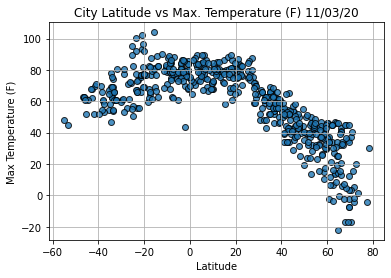

In [163]:
# Building the scatter plot
plt.title(f'City Latitude vs Max. Temperature (F) {time.strftime("%x")}')
plt.scatter(lat, max_temp,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()


### Plotting the Latitude vs Humidity

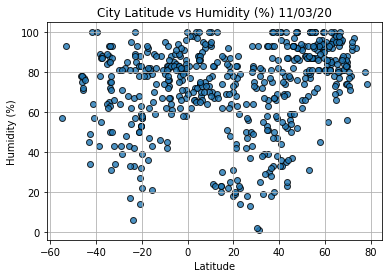

In [164]:
# Building the scatter plot
plt.title(f'City Latitude vs Humidity (%) {time.strftime("%x")}')
plt.scatter(lat, humidity,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()



### Plotting the Latitude vs Cloudiness

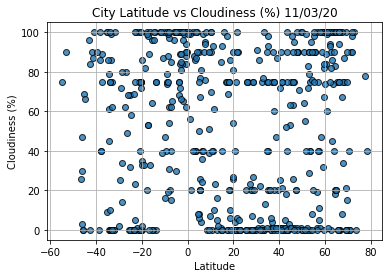

In [165]:
plt.title(f'City Latitude vs Cloudiness (%) {time.strftime("%x")}')
plt.scatter(lat, cloudiness,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()


### Plotting the Latitude vs Cloudiness

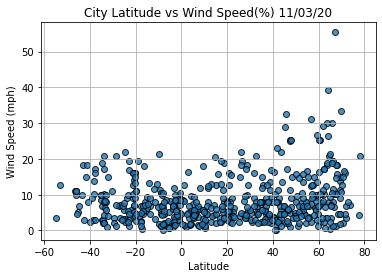

In [167]:
plt.title(f'City Latitude vs Wind Speed(%) {time.strftime("%x")}')
plt.scatter(lat, wind_speed,
            edgecolors='black', alpha=0.8, marker='o',
            linewidths=1, label='Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()
